Cosmetic Product Recommendation Using Model-based Collaborative Filtering “Singular Value Decomposition” by Simon Funk 
- Team members: 
- Bui Quang Bao            2101040035
- Nguyen Thi Trang         2101040194
- Dinh Vu Thanh Huyen      2101040105
- Phan Khanh Huyen         2101040106

Everything to run this code:
1. Python version required to run the library scikit-surprise:
Python 3.9

2. Environment
This code is running in Jupiter notebook on VSCode

3. Install the necessary library
- %pip install scikit-surprise (for recommendation algorithms)
- %pip install pandas (for reading dataset)
- %pip install numpy (for computational)
- %pip install matplotlib (for visualization)

4. Run every rows to take the expected results in the research papers, the parameters are already tuned 

5. Paper: https://docs.google.com/document/d/1D9PB-4FNG73wRcBel01j7J6QG1TsYdLe591lqFpy-Ic/

Install necessary libraries

In [36]:
%pip install scikit-surprise
%pip install pandas
%pip install numpy
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

- Open dataset and preproocessing 
- Make sure you have already changed the path of the dataset

In [37]:
from surprise import SVD, SVDpp, KNNBasic, BaselineOnly
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

import pandas as pd

# Load dataset
data = pd.read_csv('nyka_top_brands_cosmetics_product_reviews.csv')

# Select relevant columns
selected_columns = ["author", "product_id", "review_rating", "product_title"]
selected_data = data[selected_columns]
# Map user and product IDs to integers
user_map = {user_id: idx for idx, user_id in enumerate(selected_data['author'].unique())}
product_map = {product_id: idx for idx, product_id in enumerate(selected_data['product_id'].unique())}
selected_data = selected_data[selected_data['review_rating'] >= 1]
selected_data.loc[:, 'author'] = selected_data['author'].map(user_map)
selected_data.loc[:, 'product_id'] = selected_data['product_id'].map(product_map)
selected_data['review_rating'] = selected_data['review_rating'].astype(int)


Using GridsearchCV to find best parameters for Funk SVD

In [38]:
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(selected_data.iloc[:, :3], reader)
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=0)
param_grid_svd = {'n_factors': [5, 10, 15, 20, 25, 30], 'n_epochs': [10, 20, 30, 40]}
gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse', 'mae'], cv=3)
gs_svd.fit(dataset)
results_df = pd.DataFrame.from_dict(gs_svd.cv_results)
print(results_df[['params', 'mean_test_rmse', 'mean_test_mae']])
best_rmse_svd = gs_svd.best_score['rmse']
best_mae_svd = gs_svd.best_score['mae']
best_params_svd = gs_svd.best_params['rmse']

print("Best RMSE Score for SVD:", best_rmse_svd)
print("Best MAE Score for SVD:", best_mae_svd)
print("Best Parameters for SVD:", best_params_svd)

                               params  mean_test_rmse  mean_test_mae
0    {'n_factors': 5, 'n_epochs': 10}        0.947414       0.633643
1    {'n_factors': 5, 'n_epochs': 20}        0.943335       0.628932
2    {'n_factors': 5, 'n_epochs': 30}        0.941694       0.624981
3    {'n_factors': 5, 'n_epochs': 40}        0.944277       0.623373
4   {'n_factors': 10, 'n_epochs': 10}        0.947351       0.633535
5   {'n_factors': 10, 'n_epochs': 20}        0.943358       0.628638
6   {'n_factors': 10, 'n_epochs': 30}        0.943668       0.625288
7   {'n_factors': 10, 'n_epochs': 40}        0.944173       0.621912
8   {'n_factors': 15, 'n_epochs': 10}        0.947168       0.633584
9   {'n_factors': 15, 'n_epochs': 20}        0.942886       0.627938
10  {'n_factors': 15, 'n_epochs': 30}        0.943785       0.624525
11  {'n_factors': 15, 'n_epochs': 40}        0.944196       0.621937
12  {'n_factors': 20, 'n_epochs': 10}        0.947145       0.633497
13  {'n_factors': 20, 'n_epochs': 

Calculate error between multiple models


In [39]:


# Train the SVD model
model = SVD(n_factors = 5, n_epochs = 30)
model.fit(trainset)
knn_model = KNNBasic()
baseline_model = BaselineOnly()
knn_model.fit(trainset)
baseline_model.fit(trainset)
# Predict for the test set
predictions = model.test(testset)

#====================================================RMSE, MAE of SVD========================================================================
print('SVD: ')
rmse_svd = accuracy.rmse(predictions)
mae_svd = accuracy.mae(predictions)
#============================================================================================================================================

#====================================================RMSE, MAE of Baseline Only==============================================================
predictions = baseline_model.test(testset)
print('Baseline Only: ')
rmse_baseline = accuracy.rmse(predictions)
mae_baseline = accuracy.mae(predictions)
#============================================================================================================================================

#====================================================RMSE, MAE of KNN========================================================================
predictions = knn_model.test(testset)
print('KNN: ')
rmse_knn = accuracy.rmse(predictions)
mae_knn = accuracy.mae(predictions)
#============================================================================================================================================


Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
SVD: 
RMSE: 0.9415
MAE:  0.6267
Baseline Only: 
RMSE: 0.9446
MAE:  0.6293
KNN: 
RMSE: 1.0440
MAE:  0.6961


the model is work good, no overfitting, no underfitting, so train the whole dataset

In [40]:
#print some tail...
print(selected_data)


      author  product_id  review_rating  \
0          0           0              5   
1          1           0              5   
2          2           0              4   
3          3           0              3   
4          4           0              2   
...      ...         ...            ...   
61279   3279         293              5   
61280  41517         293              5   
61281  41554         293              5   
61282  41490         293              5   
61283   7394         294              2   

                                           product_title  
0      Olay Ultra Lightweight Moisturiser: Luminous W...  
1      Olay Ultra Lightweight Moisturiser: Luminous W...  
2      Olay Ultra Lightweight Moisturiser: Luminous W...  
3      Olay Ultra Lightweight Moisturiser: Luminous W...  
4      Olay Ultra Lightweight Moisturiser: Luminous W...  
...                                                  ...  
61279  Herbal Essences Aloe & Eucalyptus Shampoo For ...  
61280  Herb

Scenario 2: a new user come in (Userid example: 41669)
- Make sure you add the new user with the ascending order, the new order is 41669 because previous userID is 41668
- If you want to test another new userID, you should run the above code and run the next userdID 41670 (if you want to test userID 41671) and the next is 41671 and so on...
- You can add multi rows (Multiple product that user Like)
- Make sure the range of product ID is [0, 294]
- You can change the number of recommendations you want to make

In [41]:
#a new user come in
#Replace the data in new_row to add new features

#type the product_id you want to test, range [0, 294]
product_id = 186

#type rating range [1, 5]
review_rating = 5.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]

#new user ID are auto set
specific_user_id = 41669

new_row = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#you can add more rows 

new_row_df = pd.DataFrame([new_row])
selected_data = pd.concat([selected_data, new_row_df], ignore_index=True)

trainset = Dataset.load_from_df(selected_data.iloc[:, :3], reader)
trainset = trainset.build_full_trainset()

vmodel = SVD(n_factors = 5, n_epochs = 30, biased=True)
vmodel.fit(trainset)

print('User ID: ', specific_user_id)
for i in vmodel.trainset.ur[specific_user_id]:
    product_info = selected_data[selected_data['product_id'] == i[0]].iloc[0]
    print('Product ID: ', i[0], '\n', product_info['product_title'])

predictions = []


product_i, rating_i = zip(*vmodel.trainset.ur[specific_user_id])
user_testset = [(specific_user_id, iid, 0) for iid in range(0, 295) if iid not in product_i]
user_predictions = vmodel.test(user_testset)
predictions.extend(user_predictions)

predictions.sort(key=lambda x: x.est, reverse=True)

#number of recommendations you want to make
top_n = 5

user_recommendations = [pred for pred in predictions if pred.uid == specific_user_id][:top_n]

print(f"Recommendations for User {specific_user_id}:")
for pred in user_recommendations:
    product_info = selected_data[selected_data['product_id'] == pred.iid].iloc[0]
    print(product_info['product_title'])
    print("Product:", pred.iid, "Estimated Rating:", pred.est)

User ID:  41669
Product ID:  186 
 Maybelline New York The Colossal Liner - Black
Recommendations for User 41669:
Nykaa Lash Talk False Eyelash
Product: 84 Estimated Rating: 4.987874829722223
Nykaa So Matte! Mini Lipstick - 26 M Bon Bon
Product: 103 Estimated Rating: 4.9844474520340825
Nykaa SKINgenius BB Cream SPF30 - Soft Beige 02
Product: 134 Estimated Rating: 4.983659491456892
Kay Beauty Waterproof 24 Hour Kajal - Spade - Black
Product: 243 Estimated Rating: 4.983584804305609
Nykaa Paintstix! Waterproof Matte Lipstick - Polka Dots
Product: 156 Estimated Rating: 4.981320412543415


Scenario 1: Predict recommendations for old user (UserID: 16)
- Make sure you add the old user is in the range [0, 41668], if new user are added in the code above, the range will become [0, new UserID]
- You can add multi rows (Multiple product that user Like)
- Make sure the range of product ID is [0, 294]

In [42]:
#a new user come in
#Replace the data in new_row to add new features


#Type your userID here, make sure it is in range [0, 41666 || new user are added]
specific_user_id = 16

#type the product_id you want to test, range [0, 294]
#============================================================================================================================================
# product_id = 186

# #type rating range [1, 5]
# review_rating = 5.0

# #get the info of your product_id
# product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]

# #print it
# print('URL:', product_info['product_title'])


# new_row = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
# #you can add more rows 

# new_row_df = pd.DataFrame([new_row])
# selected_data = pd.concat([selected_data, new_row_df], ignore_index=True)
#============================================================================================================================================

trainset = Dataset.load_from_df(selected_data.iloc[:, :3], reader)
trainset = trainset.build_full_trainset()

vmodel = SVD(n_factors = 5, n_epochs = 30, biased=True)
vmodel.fit(trainset)

print('User ID: ', specific_user_id)
for i in vmodel.trainset.ur[specific_user_id]:
    product_info = selected_data[selected_data['product_id'] == i[0]].iloc[0]
    print('Product ID: ', i[0], '\n', product_info['product_title'])

predictions = []


product_i, rating_i = zip(*vmodel.trainset.ur[specific_user_id])
user_testset = [(specific_user_id, iid, 0) for iid in range(0, 295) if iid not in product_i]
user_predictions = vmodel.test(user_testset)
predictions.extend(user_predictions)

predictions.sort(key=lambda x: x.est, reverse=True)

#number of recommendations you want to make
top_n = 5

user_recommendations = [pred for pred in predictions if pred.uid == specific_user_id][:top_n]

print(f"Recommendations for User {specific_user_id}:")
for pred in user_recommendations:
    product_info = selected_data[selected_data['product_id'] == pred.iid].iloc[0]
    print(product_info['product_title'])
    print("Product:", pred.iid, "Estimated Rating:", pred.est)

User ID:  16
Product ID:  3 
 Olay White Radiance Day & Night Cream for Brightening and Glow
Product ID:  166 
 NYX Professional Makeup Liquid Suede Cream Lipstick
Product ID:  229 
 L'Oreal Paris Infallible Pro-Spray & Set Makeup Extender
Product ID:  272 
 Herbal Essences Argan Oil Of Morocco Shampoo - For Frizz Free Hair - Paraben Free
Recommendations for User 16:
Nykaa Matte to Last! Mini Liquid Lipstick - Jhumki 14
Product: 76 Estimated Rating: 5
Nykaa Lash Talk False Eyelash
Product: 84 Estimated Rating: 5
Nykaa Lash Talk False Eyelash - Major Length
Product: 85 Estimated Rating: 5
Nykaa Strobe & Glow Liquid Highlighter
Product: 86 Estimated Rating: 5
Nykaa Matte To Last! Mini Liquid Lipstick - Maithili 25
Product: 90 Estimated Rating: 5


Scenario 3: User with low rating feedback (4 products)

In [43]:
#a new user come in
#Replace the data in new_row to add new features

#new user ID are auto set
specific_user_id = 41670

#type the product_id you want to test, range [0, 294]
product_id = 186

#type rating range [1, 5]
review_rating = 1.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]


new_row = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}

#===========================================================================================================================================
product_id = 200

#type rating range [1, 5]
review_rating = 2.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]


new_row1 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#===========================================================================================================================================
product_id = 140

#type rating range [1, 5]
review_rating = 3.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]

new_row2 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#===========================================================================================================================================
product_id = 133

#type rating range [1, 5]
review_rating = 2.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]


new_row3 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#you can add more rows 

new_row_df = pd.DataFrame([new_row, new_row1, new_row2, new_row3])
selected_data = pd.concat([selected_data, new_row_df], ignore_index=True)

trainset = Dataset.load_from_df(selected_data.iloc[:, :3], reader)
trainset = trainset.build_full_trainset()

vmodel = SVD(n_factors = 5, n_epochs = 30, biased=True)
vmodel.fit(trainset)

print('User ID: ', specific_user_id)
for i in vmodel.trainset.ur[specific_user_id]:
    product_info = selected_data[selected_data['product_id'] == i[0]].iloc[0]
    print('Product ID: ', i[0], '\n', product_info['product_title'])

predictions = []


product_i, rating_i = zip(*vmodel.trainset.ur[specific_user_id])
user_testset = [(specific_user_id, iid, 0) for iid in range(0, 295) if iid not in product_i]
user_predictions = vmodel.test(user_testset)
predictions.extend(user_predictions)

predictions.sort(key=lambda x: x.est, reverse=True)

#number of recommendations you want to make
top_n = 5

user_recommendations = [pred for pred in predictions if pred.uid == specific_user_id][:top_n]

print(f"Recommendations for User {specific_user_id}:")
for pred in user_recommendations:
    product_info = selected_data[selected_data['product_id'] == pred.iid].iloc[0]
    print(product_info['product_title'])
    print("Product:", pred.iid, "Estimated Rating:", pred.est)

User ID:  41670
Product ID:  186 
 Maybelline New York The Colossal Liner - Black
Product ID:  200 
 Lakme Perfect Definition Lipliner - Mauve Passion
Product ID:  140 
 Nykaa Mermaid Squad Pouch
Product ID:  133 
 Nykaa SKINgenius BB Cream SPF30
Recommendations for User 41670:
Kay Beauty Waterproof 24 Hour Kajal - Spade - Black
Product: 243 Estimated Rating: 3.9207209933805847
Nykaa Paintstix! Waterproof Matte Lipstick - Polka Dots
Product: 156 Estimated Rating: 3.920204948269845
Kay Beauty Metallic Eyeshadow Stick Pencil
Product: 242 Estimated Rating: 3.9175891836229666
Nykaa So Matte! Mini Lipstick - 26 M Bon Bon
Product: 103 Estimated Rating: 3.917249746512885
Kay Beauty Matteinee Matte Lip Crayon Lipstick
Product: 245 Estimated Rating: 3.916977433554516


Scenario 3: 16 products with rating below 4

In [44]:
#a new user come in
#Replace the data in new_row to add new features

#new user ID are auto set
specific_user_id = 41670
#===========================================================================================================================================
#type the product_id you want to test, range [0, 294]
product_id = 1

#type rating range [1, 5]
review_rating = 1.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]

new_row = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}

#===========================================================================================================================================
product_id = 2

#type rating range [1, 5]
review_rating = 2.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]


new_row1 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#===========================================================================================================================================
product_id = 3

#type rating range [1, 5]
review_rating = 3.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]

new_row2 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#===========================================================================================================================================
product_id = 4

#type rating range [1, 5]
review_rating = 2.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]


new_row3 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#===========================================================================================================================================

#type the product_id you want to test, range [0, 294]
product_id = 5

#type rating range [1, 5]
review_rating = 1.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]

new_row4 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}

#===========================================================================================================================================
product_id = 6

#type rating range [1, 5]
review_rating = 2.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]


new_row5 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#===========================================================================================================================================
product_id = 7

#type rating range [1, 5]
review_rating = 3.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]

new_row6 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#===========================================================================================================================================
product_id = 8

#type rating range [1, 5]
review_rating = 2.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]


new_row7 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#===========================================================================================================================================

#type the product_id you want to test, range [0, 294]
product_id = 9

#type rating range [1, 5]
review_rating = 1.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]

new_row8 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}

#===========================================================================================================================================
product_id = 10

#type rating range [1, 5]
review_rating = 2.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]


new_row9 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#===========================================================================================================================================
product_id = 11

#type rating range [1, 5]
review_rating = 3.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]

new_row10 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#===========================================================================================================================================
product_id = 12

#type rating range [1, 5]
review_rating = 2.0

#get the info of your product_id
product_info = selected_data[selected_data['product_id'] == product_id].iloc[0]


new_row11 = {'author': specific_user_id, 'product_id': product_id, 'review_rating': review_rating, 'product_title': product_info['product_title']}
#===========================================================================================================================================

#you can add more rows 

new_row_df = pd.DataFrame([new_row, new_row1, new_row2, new_row3,new_row4, new_row5, new_row6, new_row7,new_row8, new_row9, new_row10, new_row1])
selected_data = pd.concat([selected_data, new_row_df], ignore_index=True)

trainset = Dataset.load_from_df(selected_data.iloc[:, :3], reader)
trainset = trainset.build_full_trainset()

vmodel = SVD(n_factors = 5, n_epochs = 30, biased=True)
vmodel.fit(trainset)



predictions = []


product_i, rating_i = zip(*vmodel.trainset.ur[specific_user_id])
user_testset = [(specific_user_id, iid, 0) for iid in range(0, 295) if iid not in product_i]
user_predictions = vmodel.test(user_testset)
predictions.extend(user_predictions)

predictions.sort(key=lambda x: x.est, reverse=True)

#number of recommendations you want to make
top_n = 5

user_recommendations = [pred for pred in predictions if pred.uid == specific_user_id][:top_n]

print(f"Recommendations for User {specific_user_id}:")
for pred in user_recommendations:
    product_info = selected_data[selected_data['product_id'] == pred.iid].iloc[0]
    print(product_info['product_title'])
    print("Product:", pred.iid, "Estimated Rating:", pred.est)

Recommendations for User 41670:
Nykaa Lash Talk False Eyelash
Product: 84 Estimated Rating: 3.2356581251613292
Nykaa So Matte! Mini Lipstick - 26 M Bon Bon
Product: 103 Estimated Rating: 3.2138970605643893
Nykaa Paintstix! Waterproof Matte Lipstick - Polka Dots
Product: 156 Estimated Rating: 3.2122637929792255
Kay Beauty Nail Nourish Nail Enamel Polish
Product: 241 Estimated Rating: 3.211165505262278
Kay Beauty Matteinee Matte Lip Crayon Lipstick
Product: 245 Estimated Rating: 3.2104823601728265


Plot the errors

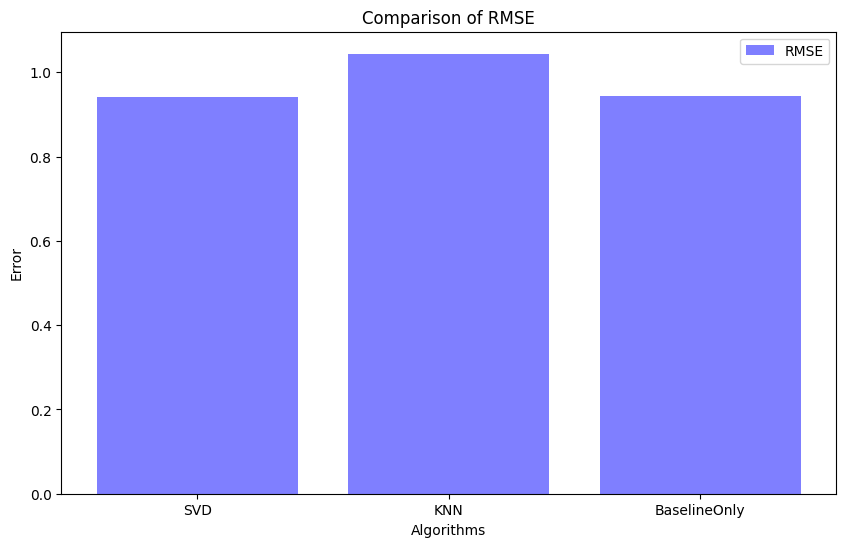

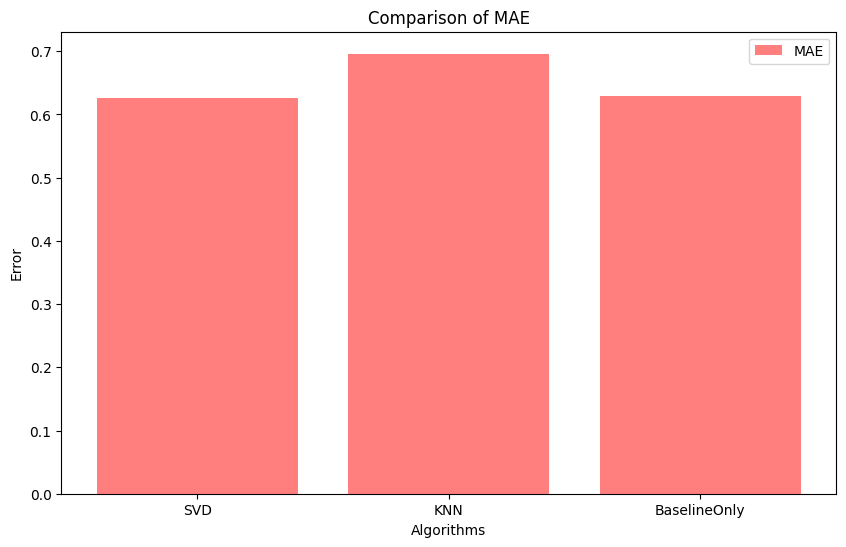

In [45]:
import matplotlib.pyplot as plt

rmse_values = [rmse_svd, rmse_knn, rmse_baseline]
mae_values = [mae_svd, mae_knn, mae_baseline]
algorithms = ['SVD', 'KNN', 'BaselineOnly']

plt.figure(figsize=(10, 6))
plt.bar(algorithms, rmse_values, color='b', alpha=0.5, label='RMSE')
plt.xlabel('Algorithms')
plt.ylabel('Error')
plt.title('Comparison of RMSE')
plt.legend()

plt.figure(figsize=(10, 6))
plt.bar(algorithms, mae_values, color='r', alpha=0.5, label='MAE')
plt.xlabel('Algorithms')
plt.ylabel('Error')
plt.title('Comparison of MAE')
plt.legend()
plt.show()